# 0) Kurulum ve kütüphaneler


In [1]:
!pip install -q seaborn plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

plt.rcParams["figure.figsize"] = (12, 4)
sns.set(style="whitegrid")
pd.options.display.float_format = "{:.3f}".format

# 1) Veri setini yükle


In [2]:
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/log2.csv'

df = pd.read_csv(DATA_PATH)

df.columns = (df.columns
              .str.lower()
              .str.replace(' ', '_', regex=False))

df.head()

Mounted at /content/drive


,source_port,destination_port,nat_source_port,nat_destination_port,action,bytes,bytes_sent,bytes_received,packets,elapsed_time_(sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


# 2) Hızlı özet, eksik değer, temel istatistik


In [3]:
print(f"Satır, Sütun: {df.shape}")
display(df.info())
display(df.describe().T)

missing = df.isna().mean().mul(100).round(2)
print("\nEksik değer yüzdesi > 0:\n", missing[missing > 0])

Satır, Sütun: (65532, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   source_port           65532 non-null  int64 
 1   destination_port      65532 non-null  int64 
 2   nat_source_port       65532 non-null  int64 
 3   nat_destination_port  65532 non-null  int64 
 4   action                65532 non-null  object
 5   bytes                 65532 non-null  int64 
 6   bytes_sent            65532 non-null  int64 
 7   bytes_received        65532 non-null  int64 
 8   packets               65532 non-null  int64 
 9   elapsed_time_(sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


None

,count,mean,std,min,25%,50%,75%,max
source_port,65532.000,49391.969,15255.713,0.000,49183.000,53776.500,58638.000,65534.000
destination_port,65532.000,10577.386,18466.027,0.000,80.000,445.000,15000.000,65535.000
nat_source_port,65532.000,19282.973,21970.690,0.000,0.000,8820.500,38366.250,65535.000
nat_destination_port,65532.000,2671.050,9739.162,0.000,0.000,53.000,443.000,65535.000
bytes,65532.000,97123.950,5618438.909,60.000,66.000,168.000,752.250,1269359015.000
bytes_sent,65532.000,22385.797,3828138.650,60.000,66.000,90.000,210.000,948477220.000
bytes_received,65532.000,74738.153,2463207.712,0.000,0.000,79.000,449.000,320881795.000
packets,65532.000,102.866,5133.002,1.000,1.000,2.000,6.000,1036116.000
elapsed_time_(sec),65532.000,65.834,302.462,0.000,0.000,15.000,30.000,10824.000
pkts_sent,65532.000,41.400,3218.871,1.000,1.000,1.000,3.000,747520.000



Eksik değer yüzdesi > 0:
 Series([], dtype: float64)


# 3) Hedef dağılımı (Action)


<ipython-input-4-b2cccee7d5f2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='action', data=df, palette='viridis')


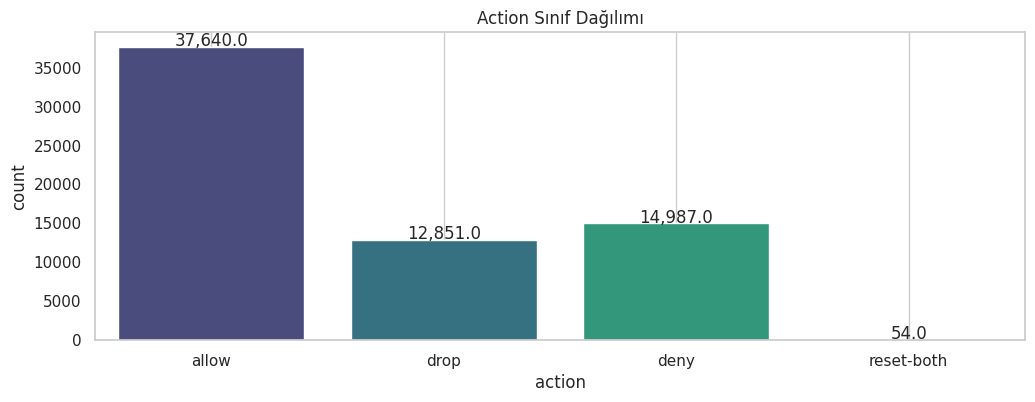

action
allow        57.440
deny         22.870
drop         19.610
reset-both    0.080
Name: proportion, dtype: float64 %


In [4]:
sns.countplot(x='action', data=df, palette='viridis')
plt.title('Action Sınıf Dağılımı')
for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height()+100,
             f"{p.get_height():,}", ha='center')
plt.grid(); plt.show()

print(df.action.value_counts(normalize=True).mul(100).round(2), "%")

# 4) Sayısal özelliklerin log-ölçek dağılımı


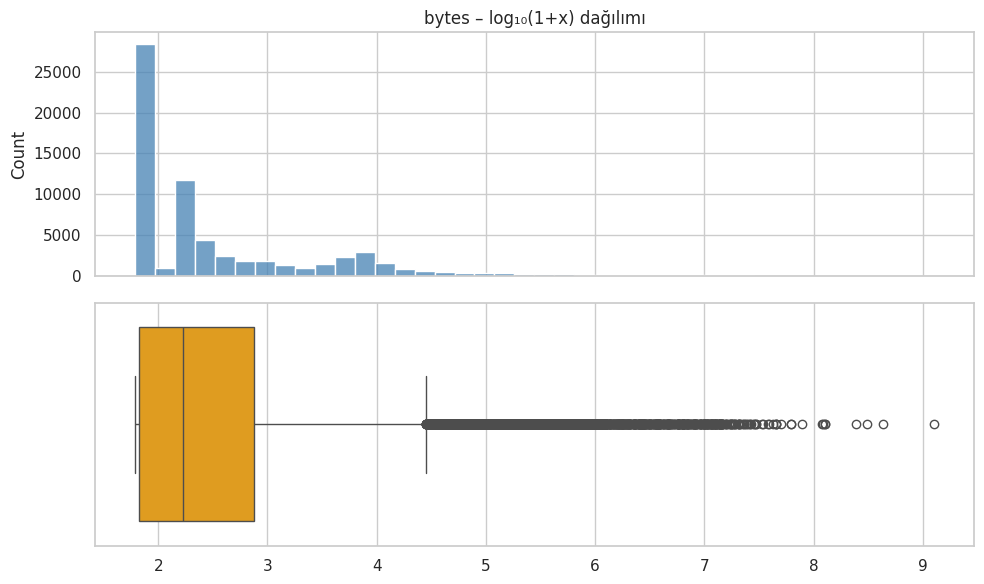

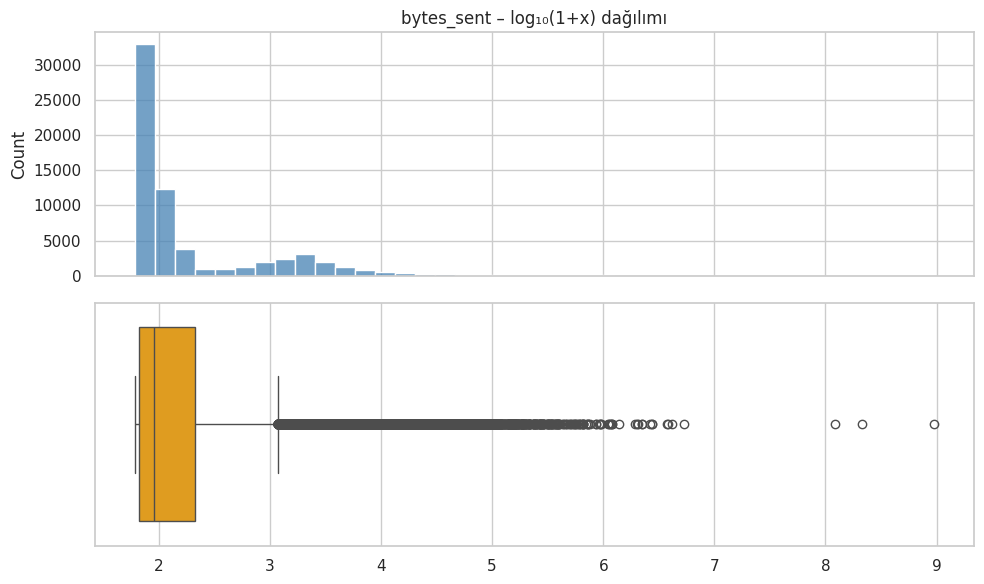

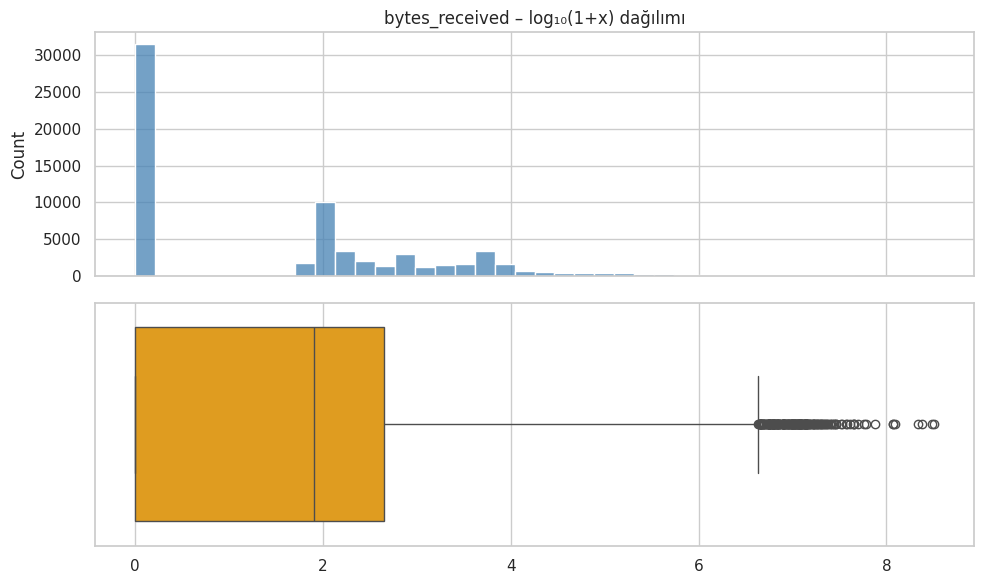

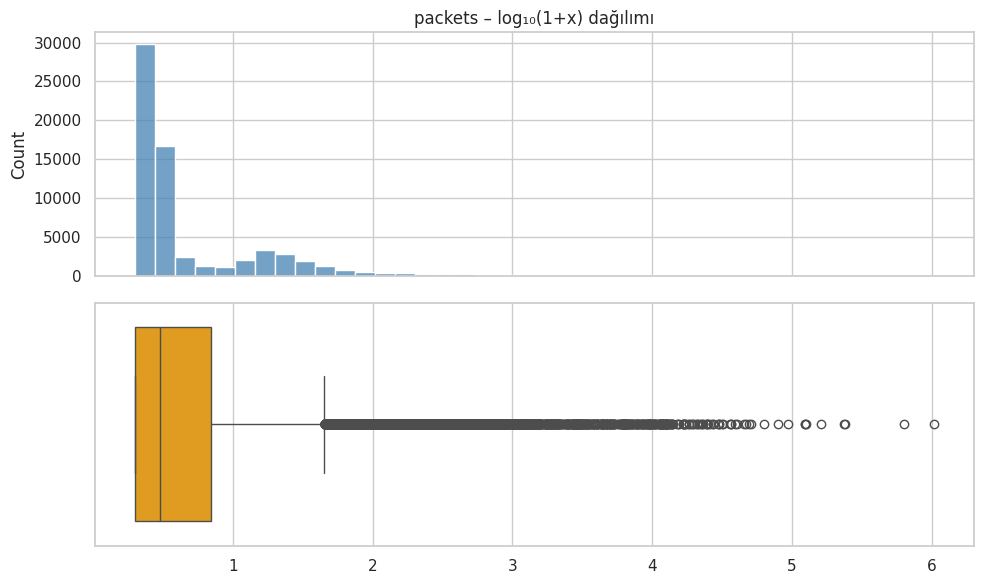

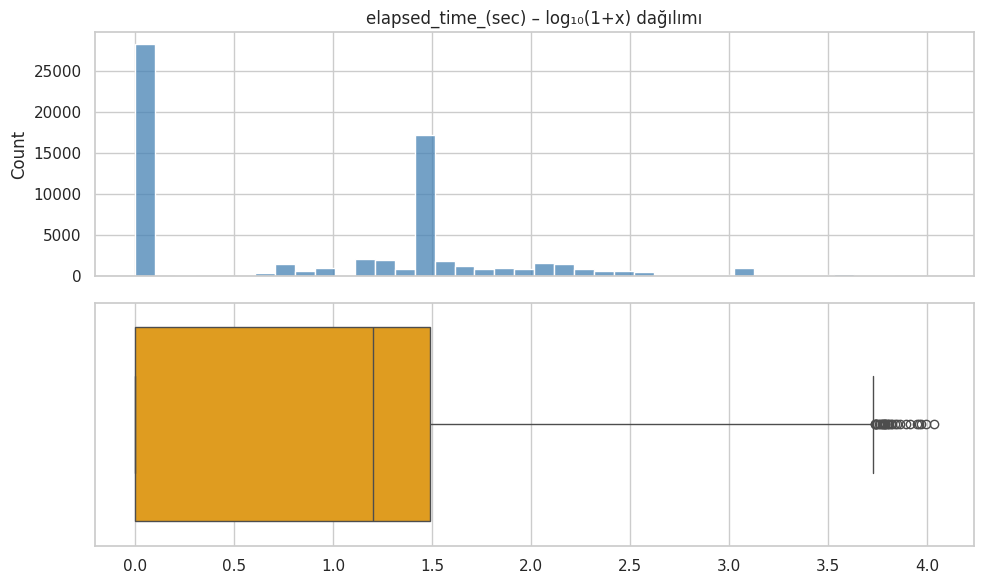

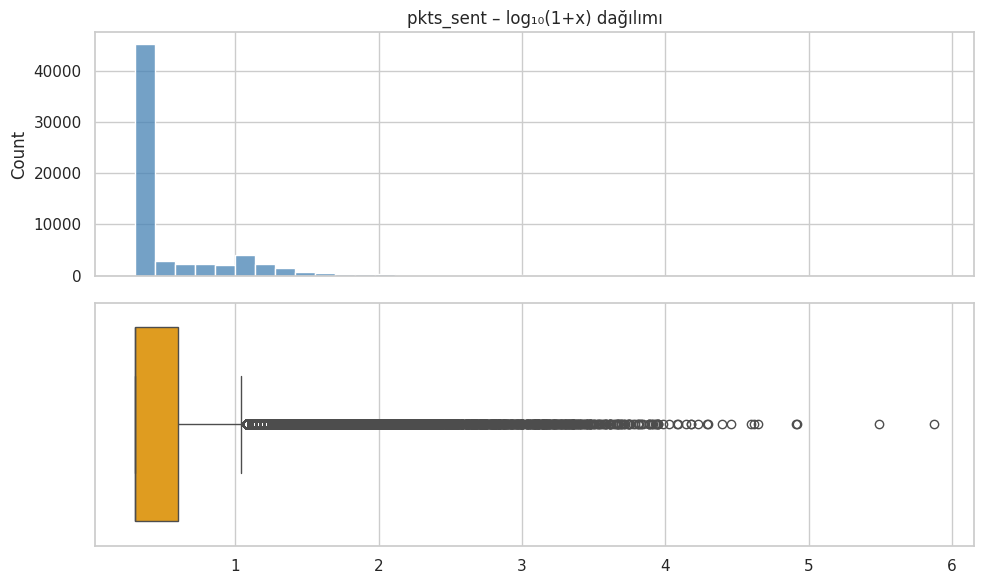

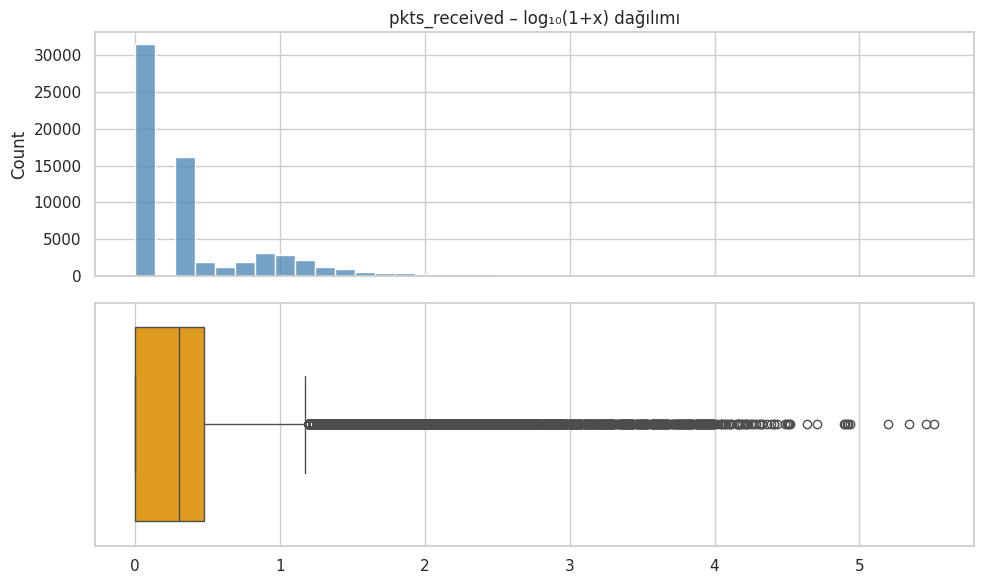

In [5]:
num_cols = ['bytes', 'bytes_sent', 'bytes_received',
            'packets', 'elapsed_time_(sec)', 'pkts_sent', 'pkts_received']

def log1p(x): return np.log10(1 + x)

for col in num_cols:
    fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    sns.histplot(log1p(df[col]), bins=40, ax=ax[0], color='steelblue')
    sns.boxplot(x=log1p(df[col]), ax=ax[1], color='orange')
    ax[0].set_title(f'{col} – log₁₀(1+x) dağılımı')
    ax[1].set_xlabel('')
    plt.tight_layout(); plt.show()

# 5) Sayısal korelasyon ısı haritası


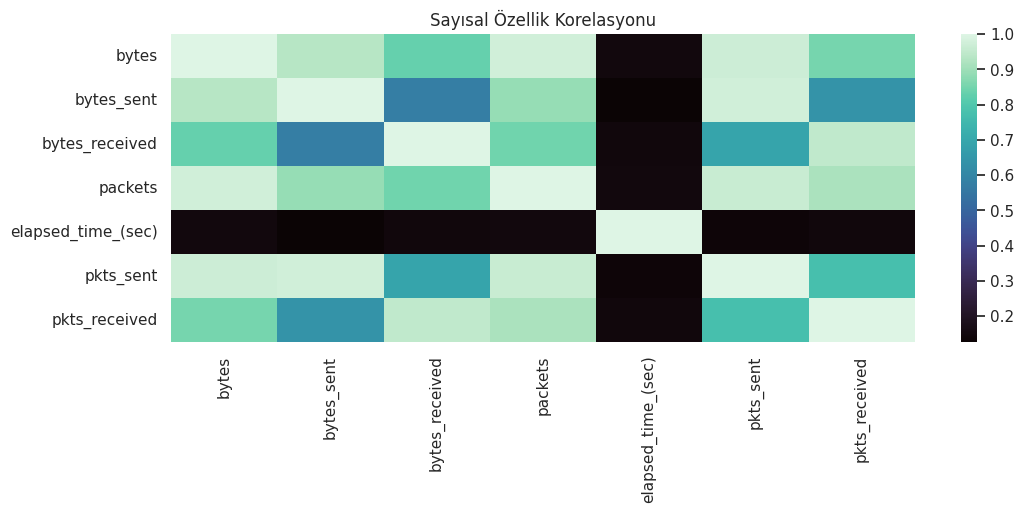

In [6]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap='mako')
plt.title("Sayısal Özellik Korelasyonu")
plt.show()

# 6) Action'a göre sayısal dağılım (violinplot)


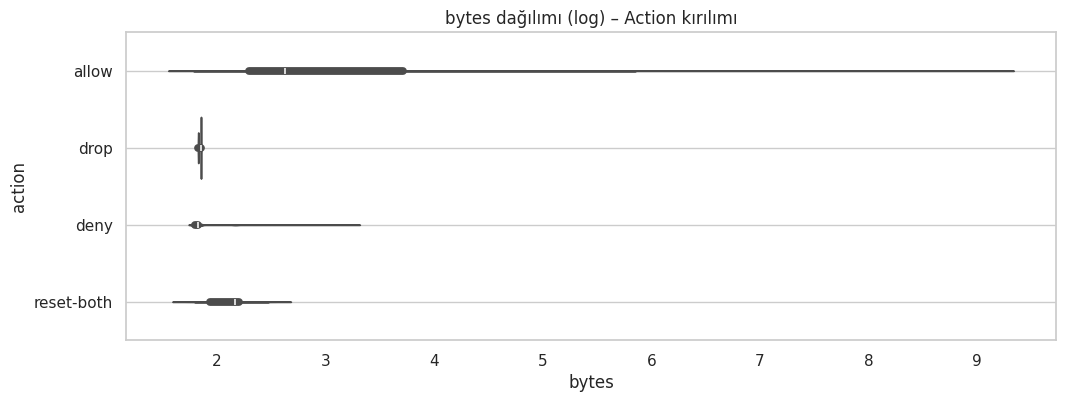

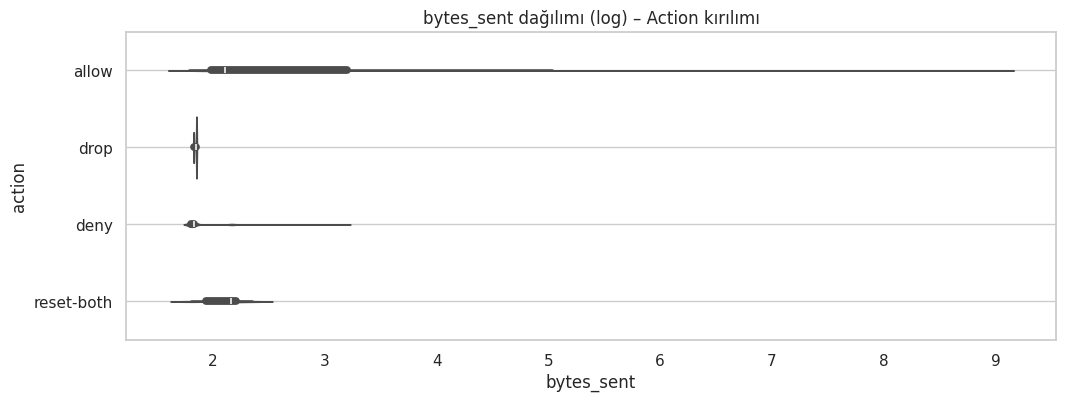

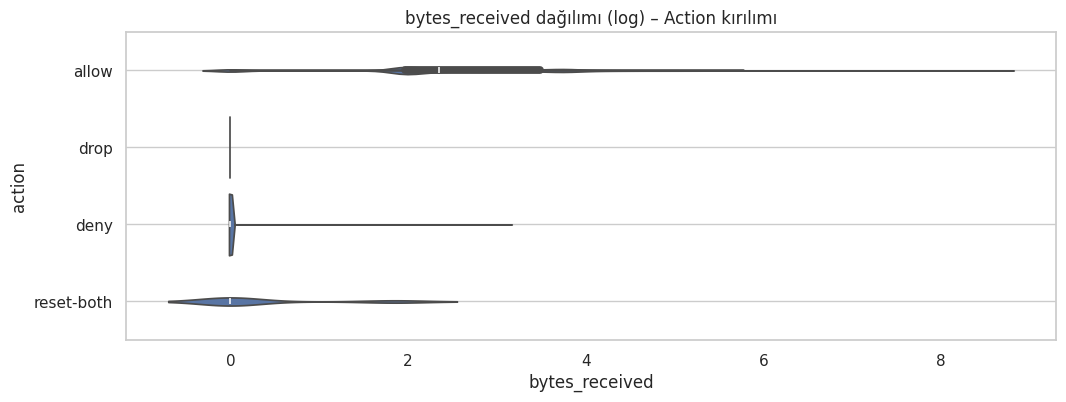

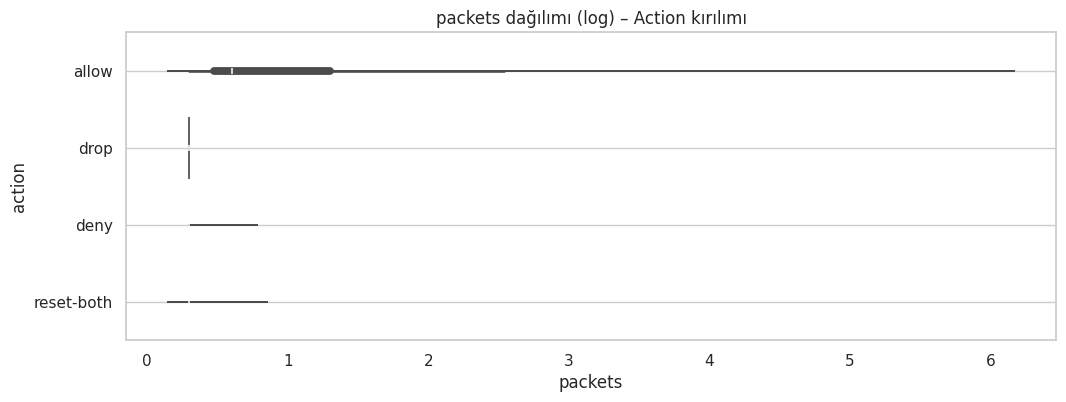

In [8]:
for col in num_cols[:4]:            # ilk 4'ü örnek olarak
    sns.violinplot(x=log1p(df[col]), y='action', data=df)
    plt.title(f'{col} dağılımı (log) – Action kırılımı')
    plt.grid(); plt.show()

# 7) Kategorik port özellikleri – en popüler 10 değer


<ipython-input-9-1c28808c5fe3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index.astype(str), y=top10.values, palette='crest')


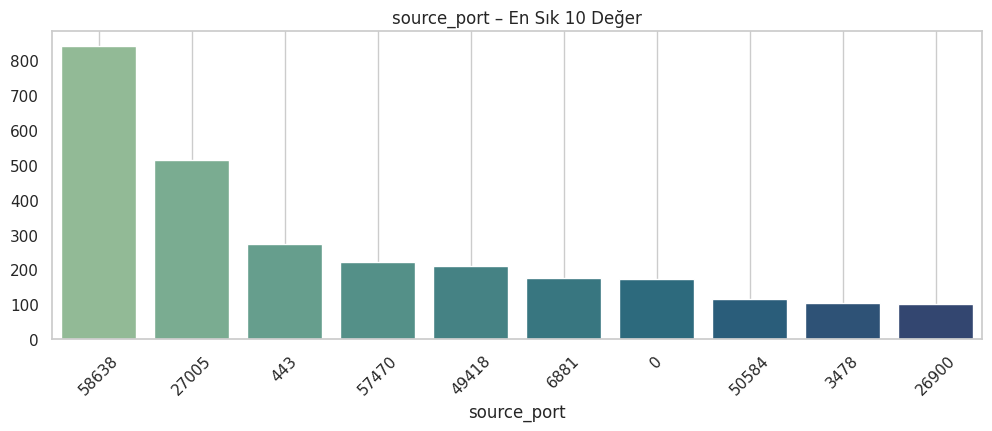

<ipython-input-9-1c28808c5fe3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index.astype(str), y=top10.values, palette='crest')


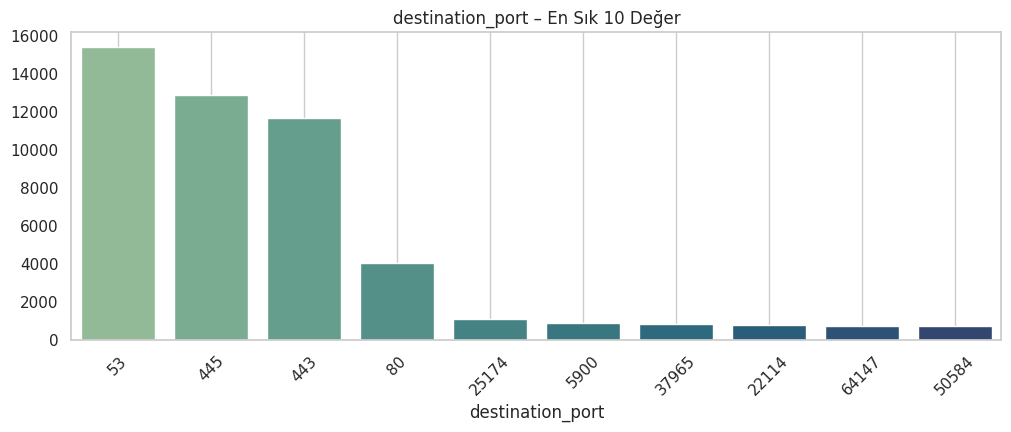

<ipython-input-9-1c28808c5fe3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index.astype(str), y=top10.values, palette='crest')


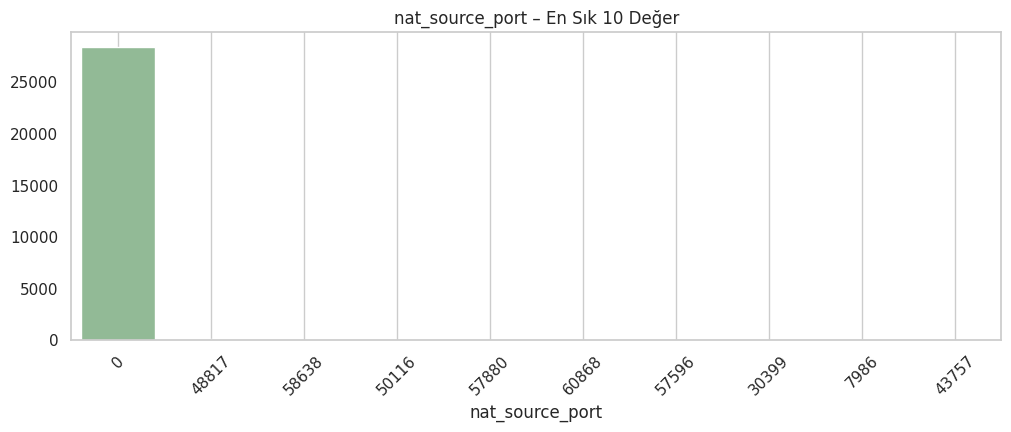

<ipython-input-9-1c28808c5fe3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index.astype(str), y=top10.values, palette='crest')


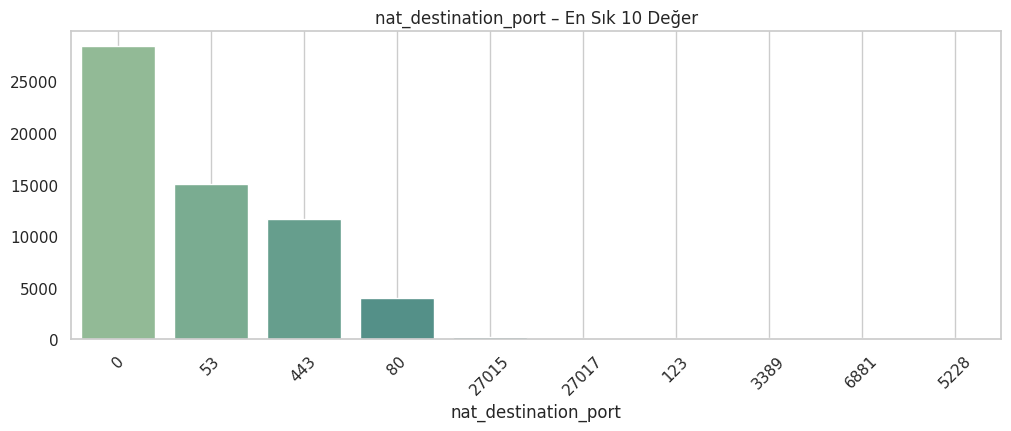

In [9]:
cat_cols = ['source_port', 'destination_port',
            'nat_source_port', 'nat_destination_port']

for col in cat_cols:
    top10 = df[col].value_counts().nlargest(10)
    sns.barplot(x=top10.index.astype(str), y=top10.values, palette='crest')
    plt.title(f'{col} – En Sık 10 Değer'); plt.xticks(rotation=45)
    plt.grid(); plt.show()


# 8) Action × Port (ısı haritası, ilk 10 değer)


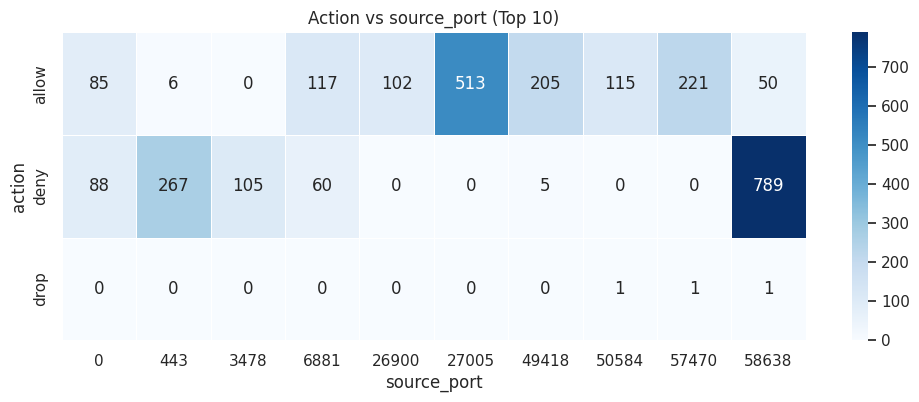

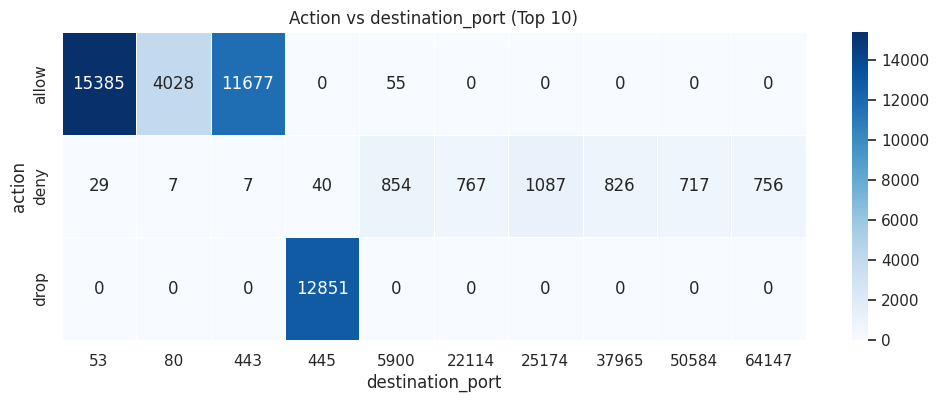

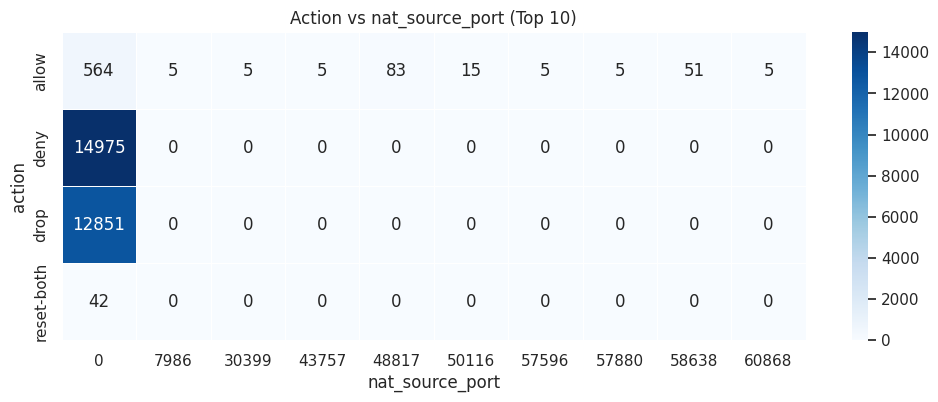

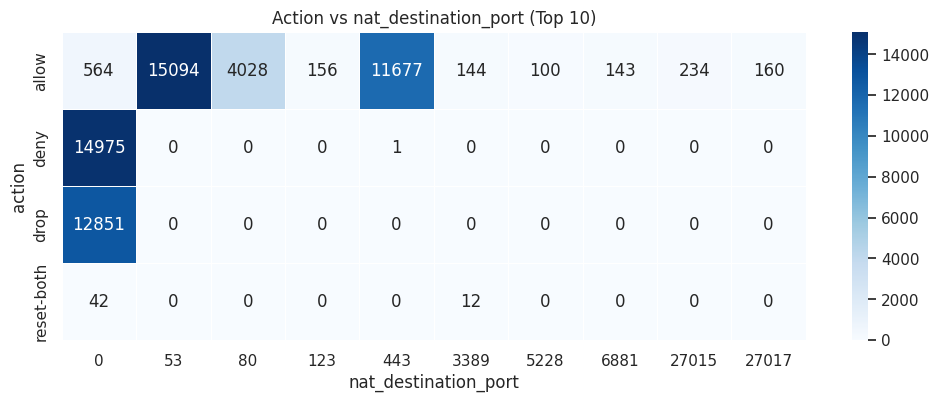

In [10]:
for col in cat_cols:
    top10 = df[col].value_counts().nlargest(10).index
    ctab = pd.crosstab(df[df[col].isin(top10)].action,
                       df[df[col].isin(top10)][col])
    sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues', linewidths=.5)
    plt.title(f'Action vs {col} (Top 10)'); plt.show()

# 9) Kaynak vs Hedef Port


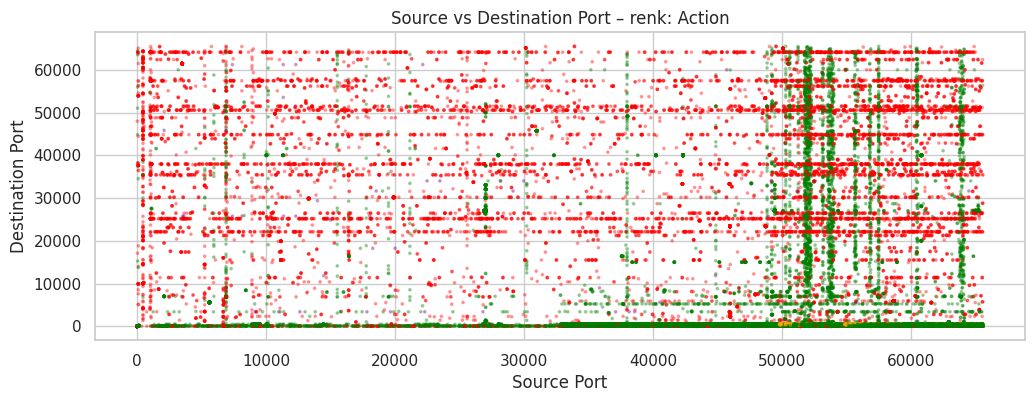

In [17]:
plt.scatter(df['source_port'], df['destination_port'],
            c=df.action.map({'allow':'green','deny':'red',
                                 'drop':'orange','reset-both':'purple'}),
            s=3, alpha=0.3)
plt.xlabel('Source Port'); plt.ylabel('Destination Port')
plt.title('Source vs Destination Port – renk: Action')
plt.show()

# 10) Türetilmiş özellik: bytes_per_packet


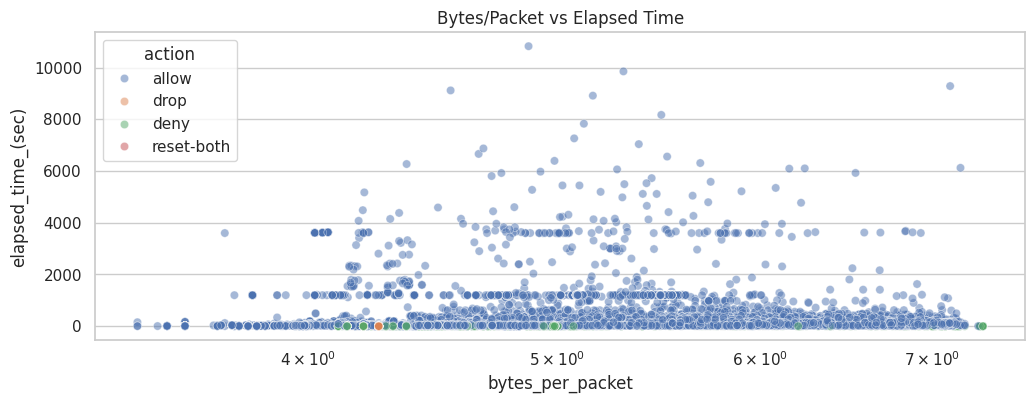

In [12]:
df['bytes_per_packet'] = df['bytes'] / df['packets'].replace(0, np.nan)
sns.scatterplot(x=np.log1p(df.bytes_per_packet),
                y=df['elapsed_time_(sec)'],
                hue=df.action, alpha=0.5)
plt.xscale('log')
plt.title('Bytes/Packet vs Elapsed Time')
plt.show()

# 11) Özet tablosu – Action'a göre temel istatistik


In [13]:
summary = (df
           .groupby('action')[num_cols]
           .agg(['mean','median','std','min','max'])
           .round(1))
summary.head()

bytes                                     bytes_sent          \
                 mean  median         std min         max       mean  median   
action                                                                         
allow      169038.000 422.000 7412624.600  60  1269359015  38917.400 126.000   
deny           83.200  66.000      88.600  60        1850     83.000  66.000   
drop           68.700  70.000       1.900  66          70     68.700  70.000   
reset-both    157.400 145.000      81.300  62         293    141.800 145.000   

                                       ... pkts_sent                      \
                   std min        max  ...      mean median      std min   
action                                 ...                                 
allow      5051106.800  60  948477220  ...    71.300  2.000 4247.000   1   
deny            87.300  60       1514  ...     1.000  1.000    0.000   1   
drop             1.900  66         70  ...     1.000  1.000    0.000   1   
reset-both      56.400  62        223  ...     1.400  1.000    0.800   1   

                   pkts_received                              
               max          mean median      std min     max  
action                                                        
allow       747520       107.000  1.000 2932.800   0  327208  
deny             3         0.000  0.000    0.000   0       2  
drop             1         0.000  0.000    0.000   0       0  
reset-both       3         0.200  0.000    0.400   0       1  

[4 rows x 35 columns]